DIEGO MARCELO GONZALEZ LUJAN 588359

A3.2_REDES_NEURONALES

En esta actividad trabajarás con la base de datos de imágenes del MNIST, misma que se usó en
el Taller de Redes Neuronales

1. Entrena un modelo de redes neuronales para clasificar los dígitos del 0 al 9, y muestra
mediante gráficas el comportamiento del sistema a lo largo del entrenamiento. Especifica
la exactitud del modelo tanto en entrenamiento como en validación.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
print(tf.__version__)
import cv2
print(cv2.__version__)


from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

2.18.0
4.11.0


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Cantidad de imágenes de entrenamiento: 60000
Cantidad de imágenes de prueba: 10000
Tamaño de cada imagen: (28, 28)

Distribución de clases (etiquetas):
Clase 0: 5923 imágenes
Clase 1: 6742 imágenes
Clase 2: 5958 imágenes
Clase 3: 6131 imágenes
Clase 4: 5842 imágenes
Clase 5: 5421 imágenes
Clase 6: 5918 imágenes
Clase 7: 6265 imágenes
Clase 8: 5851 imágenes
Clase 9: 5949 imágenes


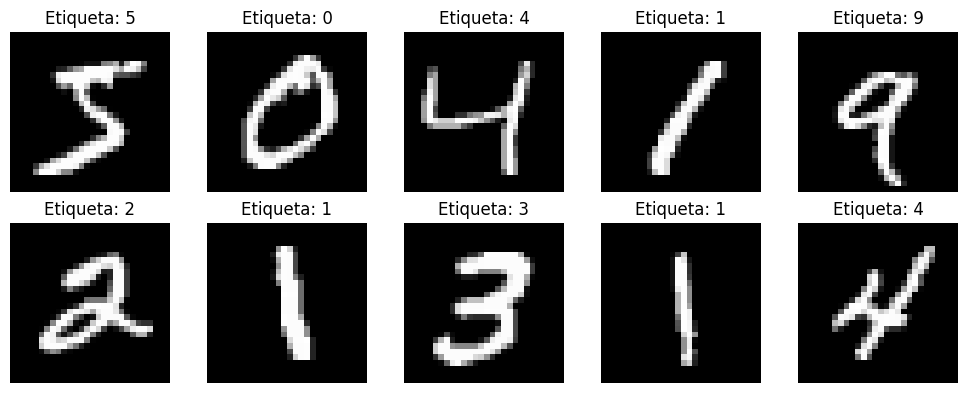


Valor mínimo de píxeles: 0
Valor máximo de píxeles: 255


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Cargar dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Revisar cantidad de imágenes y tamaño
print(f"Cantidad de imágenes de entrenamiento: {train_images.shape[0]}")
print(f"Cantidad de imágenes de prueba: {test_images.shape[0]}")
print(f"Tamaño de cada imagen: {train_images.shape[1:]}")

# Revisar proporción de clases
unique, counts = np.unique(train_labels, return_counts=True)
print("\nDistribución de clases (etiquetas):")
for label, count in zip(unique, counts):
    print(f"Clase {label}: {count} imágenes")

# Mostrar algunas imágenes
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f"Etiqueta: {train_labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# Revisar rango de valores de píxeles
print(f"\nValor mínimo de píxeles: {train_images.min()}")
print(f"Valor máximo de píxeles: {train_images.max()}")

2. Evalúa la exactitud del modelo en el conjunto de prueba generado al cargar la base de
datos y compárala con la exactitud de validación del modelo. Realiza un comentario sobre
los resultados de dicha comparación.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
import tensorflow as tf

model = Sequential()
model.add(Flatten(input_shape=(28, 28)))

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='elu'))
model.add(Dense(32, activation='elu'))
model.add(Dense(15, activation='relu'))

model.add(Dense(10, activation='softmax'))  # Capa de salida

opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()




/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 15)             │           495 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           160 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,471 (435.43 KB)

 Trainable params: 111,471 (435.43 KB)

 Non-trainable params: 0 (0.00 B)

3. Genera 50 imágenes, 5 para cada dígito. Preprocesa las imágenes para que puedan ser
evaluadas por el modelo, de forma similar a como se realizó en el taller.


early stopping


mas que nada si das mas veces osea el epochs como lo puse en 50 veces le estas diciendo que puedes hacerlo 50 veces hasta que ya no puedas mejorar, por eso corto al 14 porque ya no puede mejorar por ende el codigo dice "aqui la dejo jefe"


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

# Definir el modelo
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='elu'))
model.add(Dense(32, activation='elu'))
model.add(Dense(15, activation='relu'))

model.add(Dense(10, activation='softmax'))  # Capa de salida

# Compilar modelo
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# EarlyStopping: detener si val_accuracy no mejora en 3 epocas seguidas
early_stop = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

# Entrenar modelo con EarlyStopping
history = model.fit(
    train_images, train_labels,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    callbacks=[early_stop]
)

# Mostrar resumen del modelo
model.summary()


Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.2169 - loss: 2.7624 - val_accuracy: 0.4558 - val_loss: 1.4714
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.5123 - loss: 1.3117 - val_accuracy: 0.8562 - val_loss: 0.5961
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8822 - loss: 0.4623 - val_accuracy: 0.9383 - val_loss: 0.2636
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9474 - loss: 0.2028 - val_accuracy: 0.9492 - val_loss: 0.1969
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9606 - loss: 0.1432 - val_accuracy: 0.9550 - val_loss: 0.1848
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9668 - loss: 0.1213 - val_accuracy: 0.9549 - val_loss: 0.1856
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9695 - loss: 0.1079 - val_accuracy: 0.9603 - val_loss: 0.1796
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9733 - loss: 0.0952

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 15)             │           495 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           160 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 334,415 (1.28 MB)

 Trainable params: 111,471 (435.43 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 222,944 (870.88 KB)

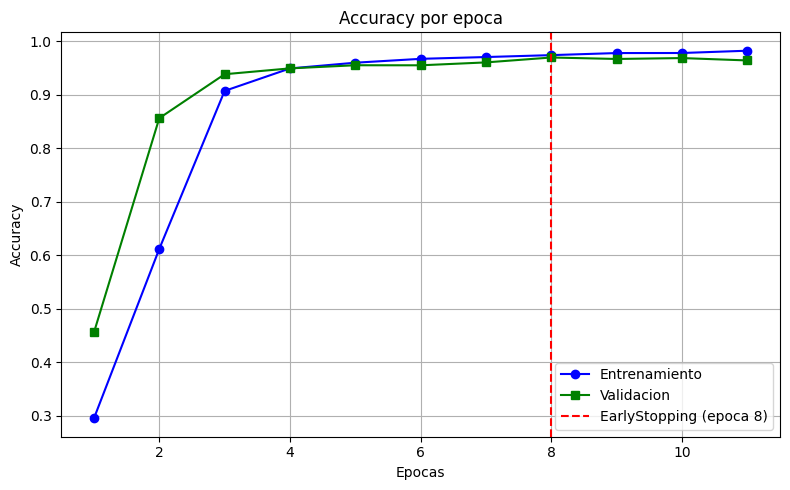

In [ ]:
import matplotlib.pyplot as plt

# Obtener accuracy de entrenamiento y validacion
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)

# Calcular la epoca donde se detuvo el entrenamiento
stop_epoch = early_stop.stopped_epoch - early_stop.patience

# Graficar
plt.figure(figsize=(8, 5))
plt.plot(epochs, acc, 'b-o', label='Entrenamiento')
plt.plot(epochs, val_acc, 'g-s', label='Validacion')
plt.axvline(x=stop_epoch + 1, color='r', linestyle='--', label=f'EarlyStopping (epoca {stop_epoch + 1})')

plt.title('Accuracy por epoca')
plt.xlabel('Epocas')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()




4. Evalúa el desempeño del modelo en dichas imágenes. Compara los resultados con los
previos y comenta motivos de potencial error.

(tube que usar el codigo del profe porque mi codigo dejo de funcionar bien, detectaba muchos 7 y 9 con numeros de 1 al 5 y sin numeros)

<IPython.core.display.Javascript object>

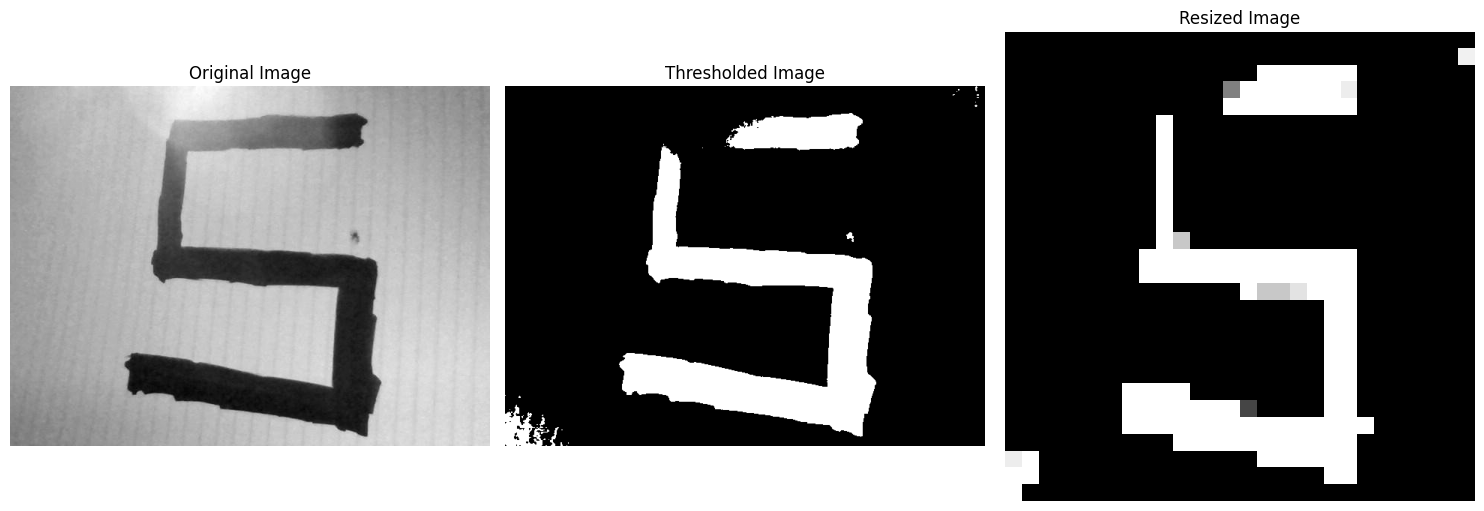

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Digit | Probability
-------------------
  0   |   0.00000
  1   |   0.00000
  2   |   0.00000
  3   |   0.00000
  4   |   0.00000
  5   |   1.00000
  6   |   0.00000
  7   |   0.00000
  8   |   0.00000
  9   |   0.00000
The predicted digit is: 5


In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
        async function takePhoto(quality) {
            const div = document.createElement('div');
            const capture = document.createElement('button');
            capture.textContent = 'Capture';
            div.appendChild(capture);

            const video = document.createElement('video');
            video.style.display = 'block';
            const stream = await navigator.mediaDevices.getUserMedia({video: true});

            document.body.appendChild(div);
            div.appendChild(video);
            video.srcObject = stream;
            await video.play();

            // Resize the output to fit the video element.
            google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

            // Wait for Capture to be clicked.
            await new Promise((resolve) => capture.onclick = resolve);

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getVideoTracks()[0].stop();
            div.remove();
            return canvas.toDataURL('image/jpeg', quality);
        }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename

# Capture an image
take_photo()

# Load the image
image = cv2.imread('photo.jpg', cv2.IMREAD_GRAYSCALE)

# Thresholding
_, thresh = cv2.threshold(image, 105, 255, cv2.THRESH_BINARY_INV)

# Resize the image to 28x28 pixels
resized = cv2.resize(thresh, (28, 28))

# Display the images side by side
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Original Image
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

# Thresholded Image
axes[1].imshow(thresh, cmap='gray')
axes[1].set_title('Thresholded Image')
axes[1].axis('off')

# Resized Image
axes[2].imshow(resized, cmap='gray')
axes[2].set_title('Resized Image')
axes[2].axis('off')

plt.tight_layout()
plt.show()

# Reshape the image for model compatibility (batch size, height, width, channels)
input_image = resized.reshape(1, 28, 28, 1)
# Use the mode's predict method
prediction = model.predict(input_image)
predicted_label = np.argmax(prediction)
# Display the result
print("Digit | Probability")
print("-------------------")
for i, prob in enumerate(prediction[0]):
    print(f"  {i}   |   {prob:.5f}")
print(f"The predicted digit is: {predicted_label}")


<IPython.core.display.Javascript object>

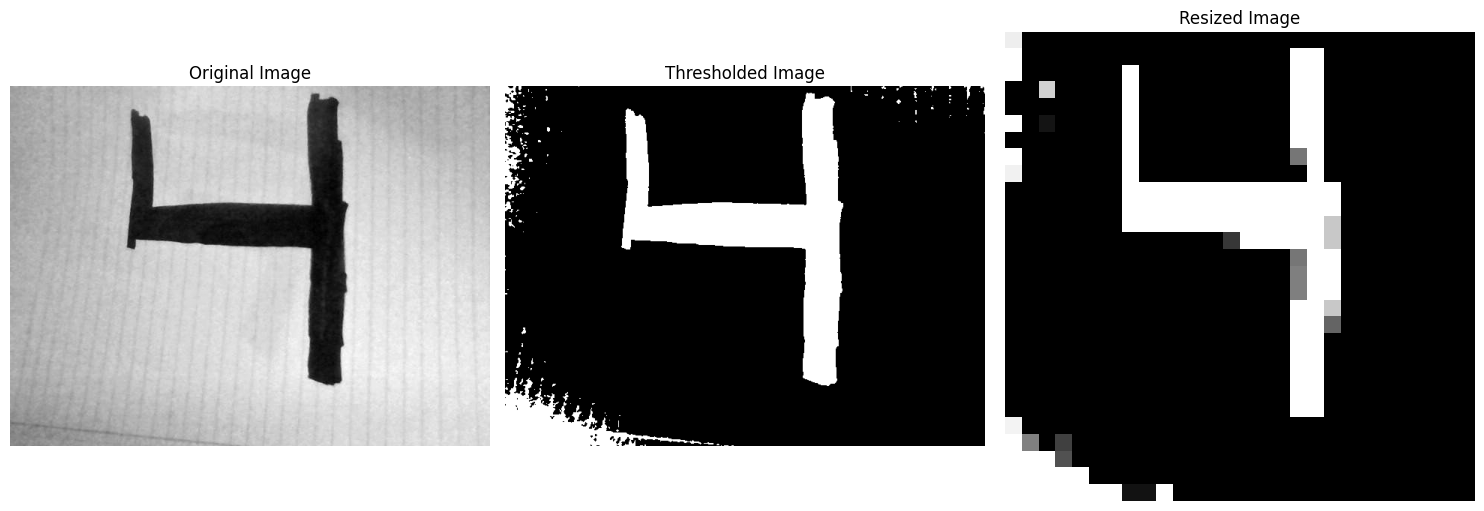

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Digit | Probability
-------------------
  0   |   0.00000
  1   |   0.00000
  2   |   0.00000
  3   |   0.00000
  4   |   0.00000
  5   |   0.00000
  6   |   0.00000
  7   |   0.99942
  8   |   0.00000
  9   |   0.00058
The predicted digit is: 7


In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
        async function takePhoto(quality) {
            const div = document.createElement('div');
            const capture = document.createElement('button');
            capture.textContent = 'Capture';
            div.appendChild(capture);

            const video = document.createElement('video');
            video.style.display = 'block';
            const stream = await navigator.mediaDevices.getUserMedia({video: true});

            document.body.appendChild(div);
            div.appendChild(video);
            video.srcObject = stream;
            await video.play();

            // Resize the output to fit the video element.
            google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

            // Wait for Capture to be clicked.
            await new Promise((resolve) => capture.onclick = resolve);

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getVideoTracks()[0].stop();
            div.remove();
            return canvas.toDataURL('image/jpeg', quality);
        }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename

# Capture an image
take_photo()

# Load the image
image = cv2.imread('photo.jpg', cv2.IMREAD_GRAYSCALE)

# Thresholding
_, thresh = cv2.threshold(image, 105, 255, cv2.THRESH_BINARY_INV)

# Resize the image to 28x28 pixels
resized = cv2.resize(thresh, (28, 28))

# Display the images side by side
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Original Image
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

# Thresholded Image
axes[1].imshow(thresh, cmap='gray')
axes[1].set_title('Thresholded Image')
axes[1].axis('off')

# Resized Image
axes[2].imshow(resized, cmap='gray')
axes[2].set_title('Resized Image')
axes[2].axis('off')

plt.tight_layout()
plt.show()

# Reshape the image for model compatibility (batch size, height, width, channels)
input_image = resized.reshape(1, 28, 28, 1)
# Use the mode's predict method
prediction = model.predict(input_image)
predicted_label = np.argmax(prediction)
# Display the result
print("Digit | Probability")
print("-------------------")
for i, prob in enumerate(prediction[0]):
    print(f"  {i}   |   {prob:.5f}")
print(f"The predicted digit is: {predicted_label}")


<IPython.core.display.Javascript object>

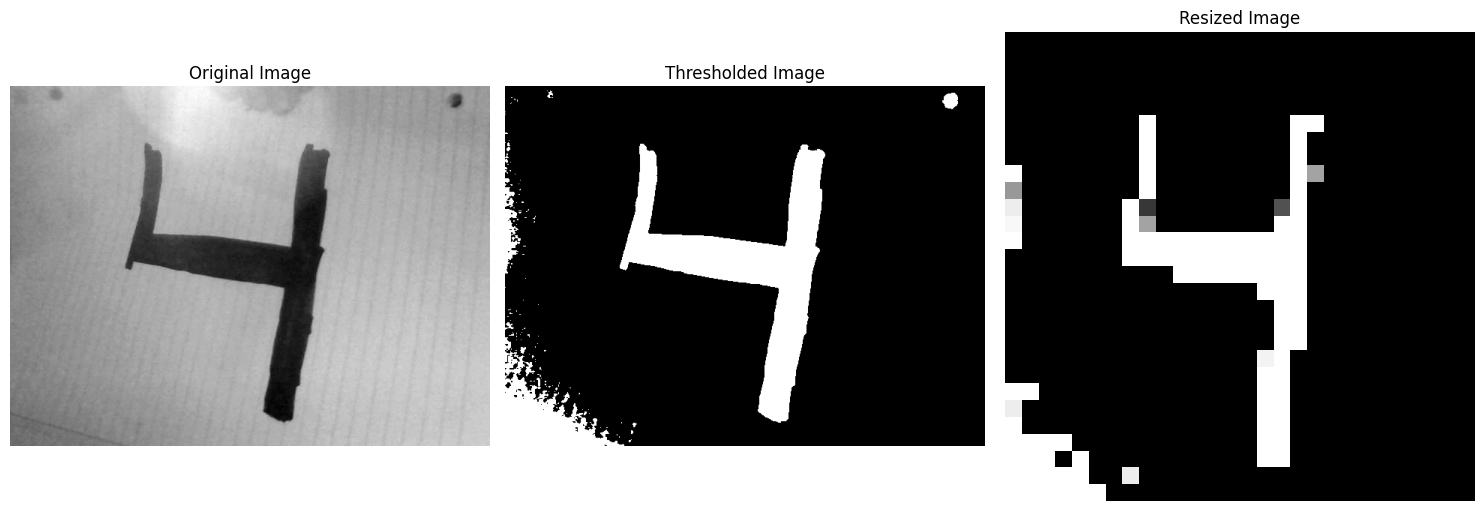

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Digit | Probability
-------------------
  0   |   0.00000
  1   |   0.00000
  2   |   0.00000
  3   |   0.00000
  4   |   0.99999
  5   |   0.00000
  6   |   0.00000
  7   |   0.00000
  8   |   0.00000
  9   |   0.00001
The predicted digit is: 4


In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
        async function takePhoto(quality) {
            const div = document.createElement('div');
            const capture = document.createElement('button');
            capture.textContent = 'Capture';
            div.appendChild(capture);

            const video = document.createElement('video');
            video.style.display = 'block';
            const stream = await navigator.mediaDevices.getUserMedia({video: true});

            document.body.appendChild(div);
            div.appendChild(video);
            video.srcObject = stream;
            await video.play();

            // Resize the output to fit the video element.
            google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

            // Wait for Capture to be clicked.
            await new Promise((resolve) => capture.onclick = resolve);

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getVideoTracks()[0].stop();
            div.remove();
            return canvas.toDataURL('image/jpeg', quality);
        }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename

# Capture an image
take_photo()

# Load the image
image = cv2.imread('photo.jpg', cv2.IMREAD_GRAYSCALE)

# Thresholding
_, thresh = cv2.threshold(image, 105, 255, cv2.THRESH_BINARY_INV)

# Resize the image to 28x28 pixels
resized = cv2.resize(thresh, (28, 28))

# Display the images side by side
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Original Image
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

# Thresholded Image
axes[1].imshow(thresh, cmap='gray')
axes[1].set_title('Thresholded Image')
axes[1].axis('off')

# Resized Image
axes[2].imshow(resized, cmap='gray')
axes[2].set_title('Resized Image')
axes[2].axis('off')

plt.tight_layout()
plt.show()

# Reshape the image for model compatibility (batch size, height, width, channels)
input_image = resized.reshape(1, 28, 28, 1)
# Use the mode's predict method
prediction = model.predict(input_image)
predicted_label = np.argmax(prediction)
# Display the result
print("Digit | Probability")
print("-------------------")
for i, prob in enumerate(prediction[0]):
    print(f"  {i}   |   {prob:.5f}")
print(f"The predicted digit is: {predicted_label}")


Los resultados muestran que el modelo acerto en la prediccion del 5 con alta confianza pero cometio un error en la prediccion del 4 en el primer intento, identificandolo como un 7.Este error podria ser por la calidad de la imagen, el preprocesamiento o un sesgo en el modelo entrenado. En el segundo intento la prediccion fue correcta lo que indica que la calidad de la foto se pudo analisar mejor.

5. Genera 3 mejoras, innovaciones, o adiciones al sistema actual (pueden ser para cualquier
etapa, desde la carga de datos, hasta los resultados de la predicción). Indica claramente
qué se hizo, por qué, y si culminaron en mejoras en la predicción o en la funcionalidad
del sistema


1.Mejorar el threshold

Lo que hice fue modificar el proceso de umbralizacion de la imagen para mejorar como el modelo recibe la imagen de entrada. Al ajustar el umbral de la imagen y hacer la binarizacion inversa, tratamos de hacer que el numero se vea mas claramaente para el modelo, lo que es importante porque muchas veces la calidad de la imagen o las condiciones de la captura puede distorsionar la prediccion.

2.Mejora el preprocesamiento de la imagen (nomralizacion y aumento de datos)

La normalizacion de pixeles se divide por 255 para que los valores esten entre 0 y 1 lo cual ayuda al modelo a entrenar mas rapido y mas eficiente. El aumento de datos crea mas ejemplos para entrenar el modelo lo que hace mas generalizable




<IPython.core.display.Javascript object>

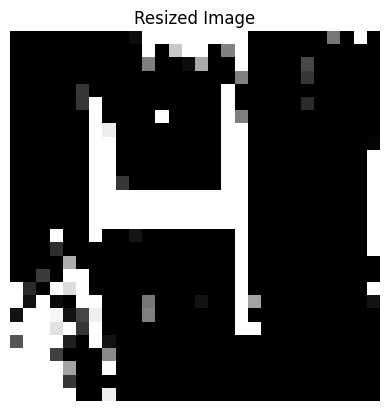

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Digit | Probability
-------------------
  0   |   0.00002
  1   |   0.00241
  2   |   0.00024
  3   |   0.00000
  4   |   0.98416
  5   |   0.00000
  6   |   0.00000
  7   |   0.00422
  8   |   0.00011
  9   |   0.00886
The predicted digit is: 4


In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
        async function takePhoto(quality) {
            const div = document.createElement('div');
            const capture = document.createElement('button');
            capture.textContent = 'Capture';
            div.appendChild(capture);

            const video = document.createElement('video');
            video.style.display = 'block';
            const stream = await navigator.mediaDevices.getUserMedia({video: true});

            document.body.appendChild(div);
            div.appendChild(video);
            video.srcObject = stream;
            await video.play();

            // Resize the output to fit the video element.
            google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

            // Wait for Capture to be clicked.
            await new Promise((resolve) => capture.onclick = resolve);

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getVideoTracks()[0].stop();
            div.remove();
            return canvas.toDataURL('image/jpeg', quality);
        }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename

# Capture an image
take_photo()

# Load the image
image = cv2.imread('photo.jpg', cv2.IMREAD_GRAYSCALE)

# Thresholding
_, thresh = cv2.threshold(image, 150, 255, cv2.THRESH_BINARY_INV)


# Redimensionar la imagen a 28x28 sin normalización
resized = cv2.resize(thresh, (28, 28))

# Visualización para asegurarnos de que la imagen está bien procesada
plt.imshow(resized, cmap='gray')
plt.title('Resized Image')
plt.axis('off')
plt.show()

# Asegúrate de que el modelo esté usando la imagen correctamente para predecir
input_image = resized.reshape(1, 28, 28, 1)

# Predicción usando el modelo cargado
prediction = model.predict(input_image)
predicted_label = np.argmax(prediction)

# Mostrar las probabilidades para cada dígito
print("Digit | Probability")
print("-------------------")
for i, prob in enumerate(prediction[0]):
    print(f"  {i}   |   {prob:.5f}")

# Mostrar el dígito predicho
print(f"The predicted digit is: {predicted_label}")


<IPython.core.display.Javascript object>

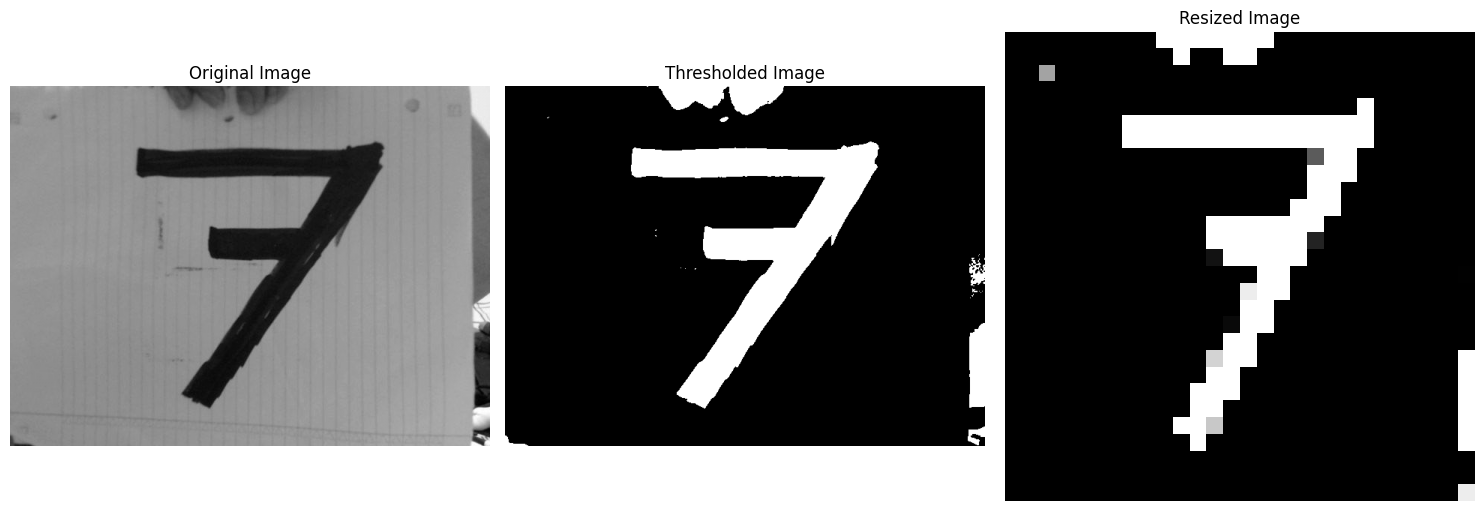

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Digit | Probability
-------------------
  0   |   0.01758
  1   |   0.01122
  2   |   0.17917
  3   |   0.26852
  4   |   0.01409
  5   |   0.06106
  6   |   0.01170
  7   |   0.29847
  8   |   0.08665
  9   |   0.05153
The predicted digit is: 7


In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
        async function takePhoto(quality) {
            const div = document.createElement('div');
            const capture = document.createElement('button');
            capture.textContent = 'Capture';
            div.appendChild(capture);

            const video = document.createElement('video');
            video.style.display = 'block';
            const stream = await navigator.mediaDevices.getUserMedia({video: true});

            document.body.appendChild(div);
            div.appendChild(video);
            video.srcObject = stream;
            await video.play();

            // Resize the output to fit the video element.
            google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

            // Wait for Capture to be clicked.
            await new Promise((resolve) => capture.onclick = resolve);

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getVideoTracks()[0].stop();
            div.remove();
            return canvas.toDataURL('image/jpeg', quality);
        }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename

# Capture an image
take_photo()

# Load the image
image = cv2.imread('photo.jpg', cv2.IMREAD_GRAYSCALE)

# Thresholding
_, thresh = cv2.threshold(image, 105, 255, cv2.THRESH_BINARY_INV)

# Resize the image to 28x28 pixels
resized = cv2.resize(thresh, (28, 28))/255


# Display the images side by side
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Original Image
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

# Thresholded Image
axes[1].imshow(thresh, cmap='gray')
axes[1].set_title('Thresholded Image')
axes[1].axis('off')

# Resized Image
axes[2].imshow(resized, cmap='gray')
axes[2].set_title('Resized Image')
axes[2].axis('off')

plt.tight_layout()
plt.show()

# Reshape the image for model compatibility (batch size, height, width, channels)
input_image = resized.reshape(1, 28, 28, 1)
# Use the mode's predict method
prediction = model.predict(input_image)
predicted_label = np.argmax(prediction)
# Display the result
print("Digit | Probability")
print("-------------------")
for i, prob in enumerate(prediction[0]):
    print(f"  {i}   |   {prob:.5f}")
print(f"The predicted digit is: {predicted_label}")


CON LAS MEJORAS YA JUNTAS

<IPython.core.display.Javascript object>

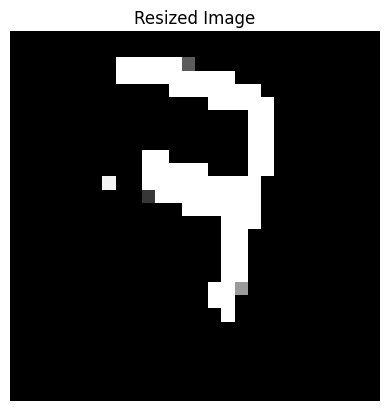

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Digit | Probability
-------------------
  0   |   0.01877
  1   |   0.01110
  2   |   0.17998
  3   |   0.28481
  4   |   0.01341
  5   |   0.05350
  6   |   0.01164
  7   |   0.29828
  8   |   0.07931
  9   |   0.04919
The predicted digit is: 7


In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
        async function takePhoto(quality) {
            const div = document.createElement('div');
            const capture = document.createElement('button');
            capture.textContent = 'Capture';
            div.appendChild(capture);

            const video = document.createElement('video');
            video.style.display = 'block';
            const stream = await navigator.mediaDevices.getUserMedia({video: true});

            document.body.appendChild(div);
            div.appendChild(video);
            video.srcObject = stream;
            await video.play();

            // Resize the output to fit the video element.
            google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

            // Wait for Capture to be clicked.
            await new Promise((resolve) => capture.onclick = resolve);

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getVideoTracks()[0].stop();
            div.remove();
            return canvas.toDataURL('image/jpeg', quality);
        }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename

# Capture an image
take_photo()

# Load the image
image = cv2.imread('photo.jpg', cv2.IMREAD_GRAYSCALE)

# Thresholding
_, thresh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)


# Redimensionar la imagen a 28x28 sin normalización
resized = cv2.resize(thresh, (28, 28))/255

# Visualización para asegurarnos de que la imagen está bien procesada
plt.imshow(resized, cmap='gray')
plt.title('Resized Image')
plt.axis('off')
plt.show()

# Asegúrate de que el modelo esté usando la imagen correctamente para predecir
input_image = resized.reshape(1, 28, 28, 1)

# Predicción usando el modelo cargado
prediction = model.predict(input_image)
predicted_label = np.argmax(prediction)

# Mostrar las probabilidades para cada dígito
print("Digit | Probability")
print("-------------------")
for i, prob in enumerate(prediction[0]):
    print(f"  {i}   |   {prob:.5f}")

# Mostrar el dígito predicho
print(f"The predicted digit is: {predicted_label}")

# Save the model
model.save("my_model.h5")

6. Considerando los cambios del punto anterior, genera un sistema que prediga en tiempo
real los dígitos del 0 al 9 a partir de la imagen capturada por la cámara de la computadora,
o algún otro dispositivo.

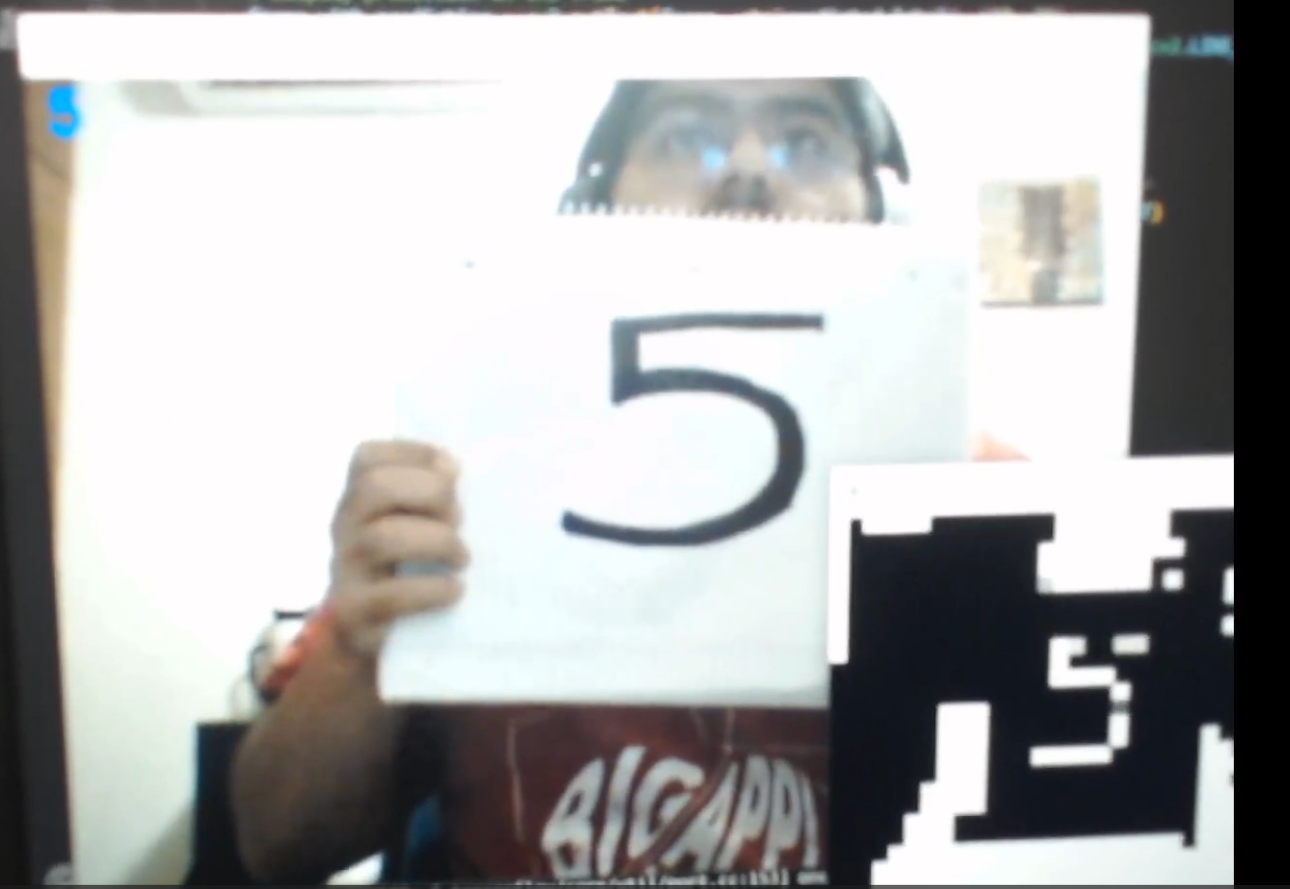

In [ ]:
import cv2
import numpy as np
import tensorflow as tf

# Load the model
model = tf.keras.models.load_model("my_model.h5")

cap = cv2.VideoCapture(0)

try:
    while True:
        ret, frame = cap.read()
        if not ret:
            break

        # Preprocess the image for prediction
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        _, threshed = cv2.threshold(gray, 105, 255, cv2.THRESH_BINARY_INV)
        resized = cv2.resize(threshed, (28, 28))

        # Normalizamos la imagen
        normalized = resized / 255.0
        input_img = normalized.reshape(1, 28, 28, 1)

        # Predict
        prediction = model.predict(input_img)
        predicted_label = np.argmax(prediction)

        # Display prediction on the frame
        frame_with_prediction = cv2.putText(frame, str(predicted_label), (10, 30),
                                            cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)

        # Display the original frame with prediction
        cv2.imshow('Real-time prediction', frame_with_prediction)

        # Display the resized image (sin normalizar) en otra ventana para visualizar mejor
        upscaled_resized = cv2.resize(resized, (280, 280), interpolation=cv2.INTER_NEAREST)
        cv2.imshow('Resized Image', upscaled_resized)

        # Press 'q' to quit
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

except KeyboardInterrupt:
    pass
finally:
    cap.release()
    cv2.destroyAllWindows()
